In [1]:
import pandas as pd
import numpy as np
import re
import string
df = pd.read_csv("twitter_training.csv", header=None , index_col=[0])
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [2]:
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


**Feature Extraction**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  74682 non-null  object
 1   text       73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [5]:
df.sample(10)

,sentiment,text
20076,Irrelevant,I look cute
73809,Positive,Now nVidia has more time to get the 3000 s out...
18297,Positive,RhandlerR so whenever I get my PS5 I’m most li...
53824,Negative,Dear @CallofDuty fix your stupid game new omg ...
361,Positive,I have the feeling that I have achieved someth...
35353,Neutral,Bill Gates Sr. is dead. Microsoft co-founder B...
7752,Positive,never get tired of getting the good teammate a...
64786,Negative,@EAMaddenNFL why y ’ all hate its franchise ga...
19609,Neutral,Only Tuesday in WoW
46309,Positive,I am using prepaid @ Verizon for my mobile pla...


In [6]:
df.dropna(inplace=True)


In [7]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(71890, 2106)

In [8]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(73996, 2)
(71890, 2)


In [9]:
df.sample(10)

,sentiment,text
9182,Positive,Lets go!!! Overwatch and good vibes!!! Come ha...
73719,Negative,Anyone notice the ratio between conferred get ...
6064,Neutral,You will definitely indeed not go far wrong wi...
56245,Negative,Fix the soundbugs @ Ubisoft @ Rainbow6Game. It...
28502,Neutral,Solo Mirage when shit team rages - Part 2.. st...
30823,Irrelevant,Don't make the same mistake I made... my brain...
1133,Irrelevant,Now also I have a PC and waiting for new colou...
33563,Positive,Winning P
18855,Neutral,I just earned the [Guild Member of Clan Catacl...
60175,Positive,Sounds like a lot of fun.


In [10]:
df['sentiment'].value_counts()

sentiment
Negative      21758
Positive      19912
Neutral       17614
Irrelevant    12606
Name: count, dtype: int64

In [ ]:
# Define a function to calculate basic text features
def add_basic_features(df, text_column='Text'):
    df['char_counts'] = df[text_column].apply(len)  
    df['word_counts'] = df[text_column].apply(lambda x: len(x.split()))  
    df['avg_wordlength'] = df['char_counts'] / (df['word_counts'] + 1)  
    df['stopwords_counts'] = df[text_column].apply(lambda x: len([w for w in x.split() if w.lower() in stopwords]))
    df['hashtag_counts'] = df[text_column].apply(lambda x: x.count('#'))  
    df['mentions_counts'] = df[text_column].apply(lambda x: x.count('@'))  
    df['digits_counts'] = df[text_column].apply(lambda x: len([ch for ch in x if ch.isdigit()]))  
    df['uppercase_counts'] = df[text_column].apply(lambda x: len([ch for ch in x if ch.isupper()]))  
    return df

stopwords = set(["a", "an", "the", "and", "is", "in", "it", "on", "at", "to", "with"])

# Add features to the dataset
df = add_basic_features(df, text_column='text')
df.columns



Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [12]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,53,11,4.416667,2,0,0,0,0
1,Positive,I am coming to the borders and I will kill you...,51,12,3.923077,3,0,0,0,2
2,Positive,im getting on borderlands and i will kill you ...,50,10,4.545455,2,0,0,0,0
3,Positive,im coming on borderlands and i will murder you...,51,10,4.636364,2,0,0,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,57,12,4.384615,2,0,0,1,0


**Data Visualization**

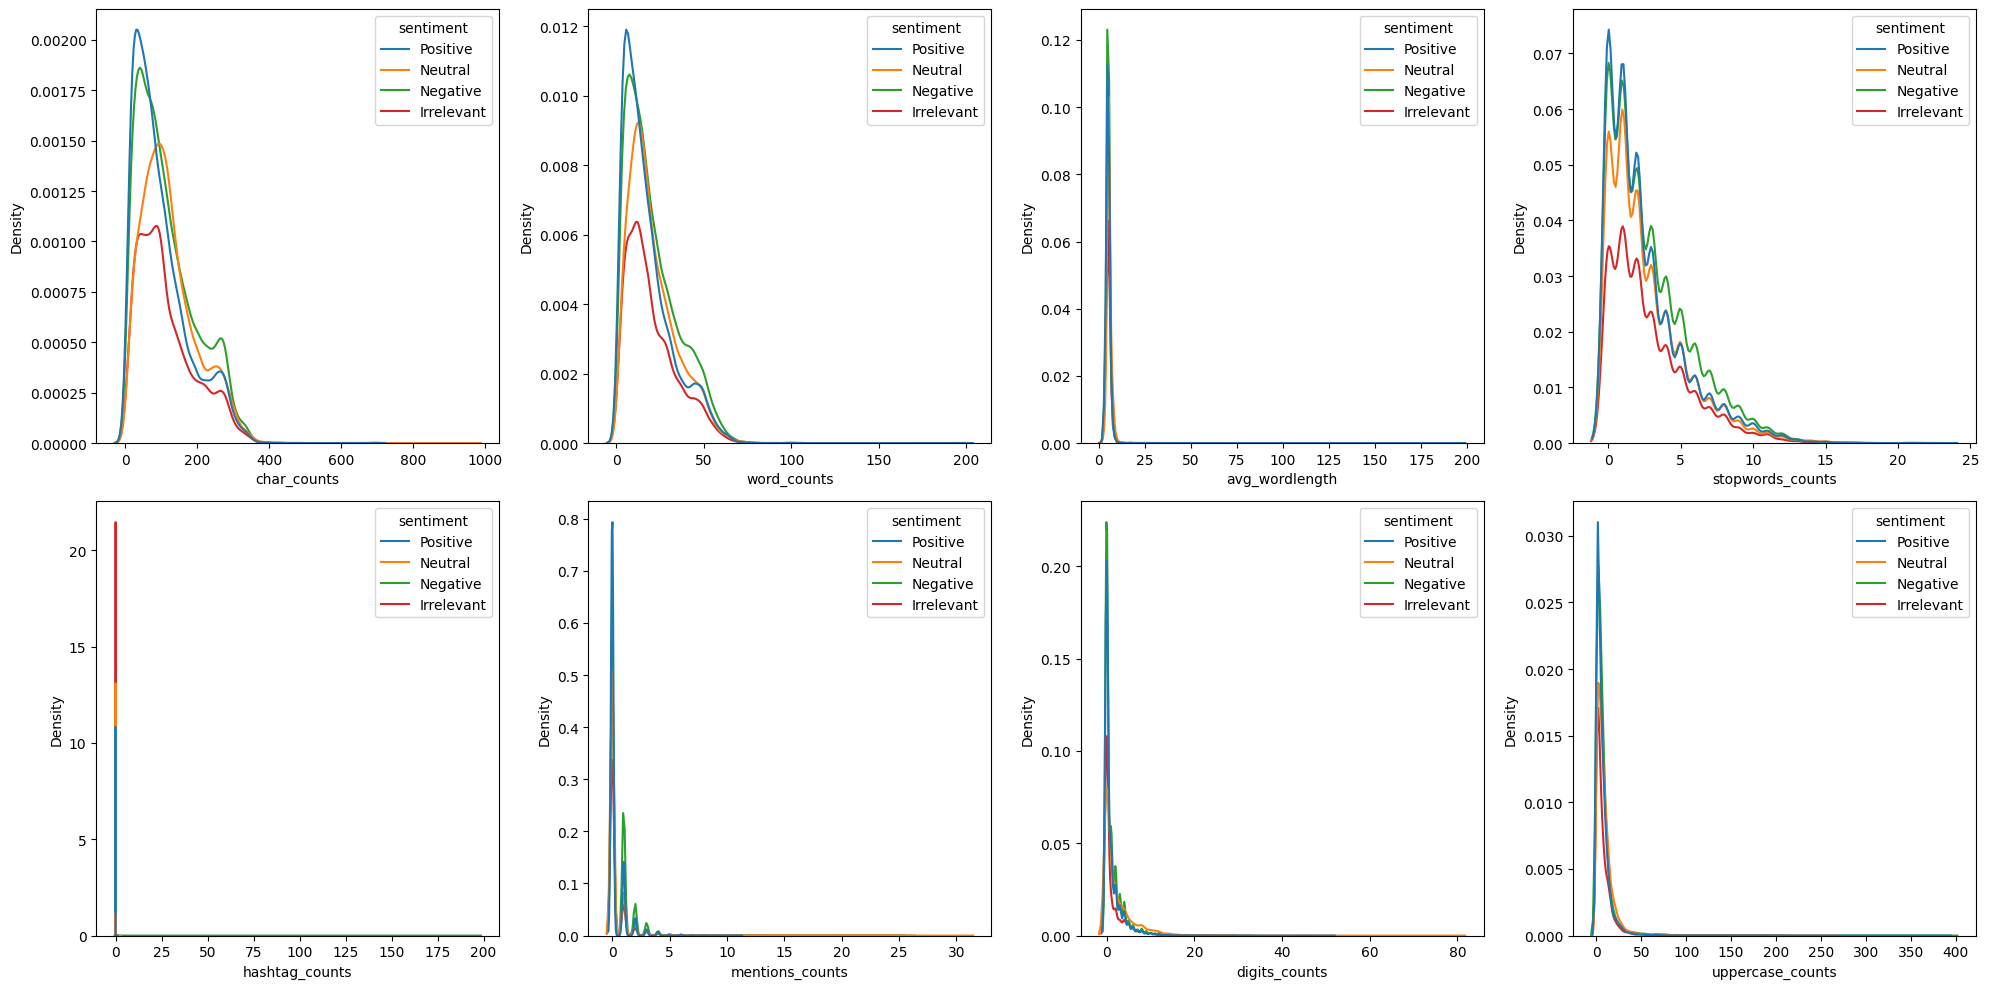

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)
    sns.kdeplot(data=df, x=col, hue="sentiment", fill=False)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

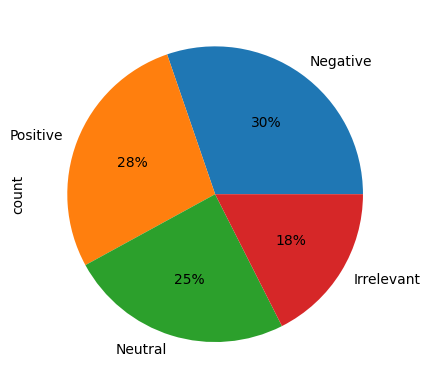

In [16]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [18]:
## Wordcloud visulization
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

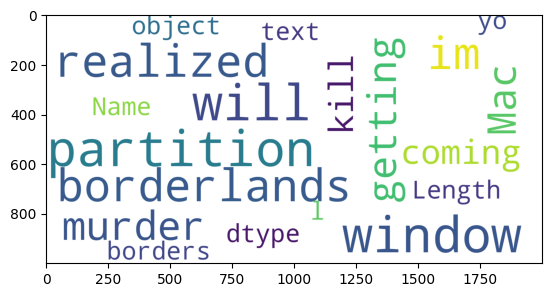

In [19]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

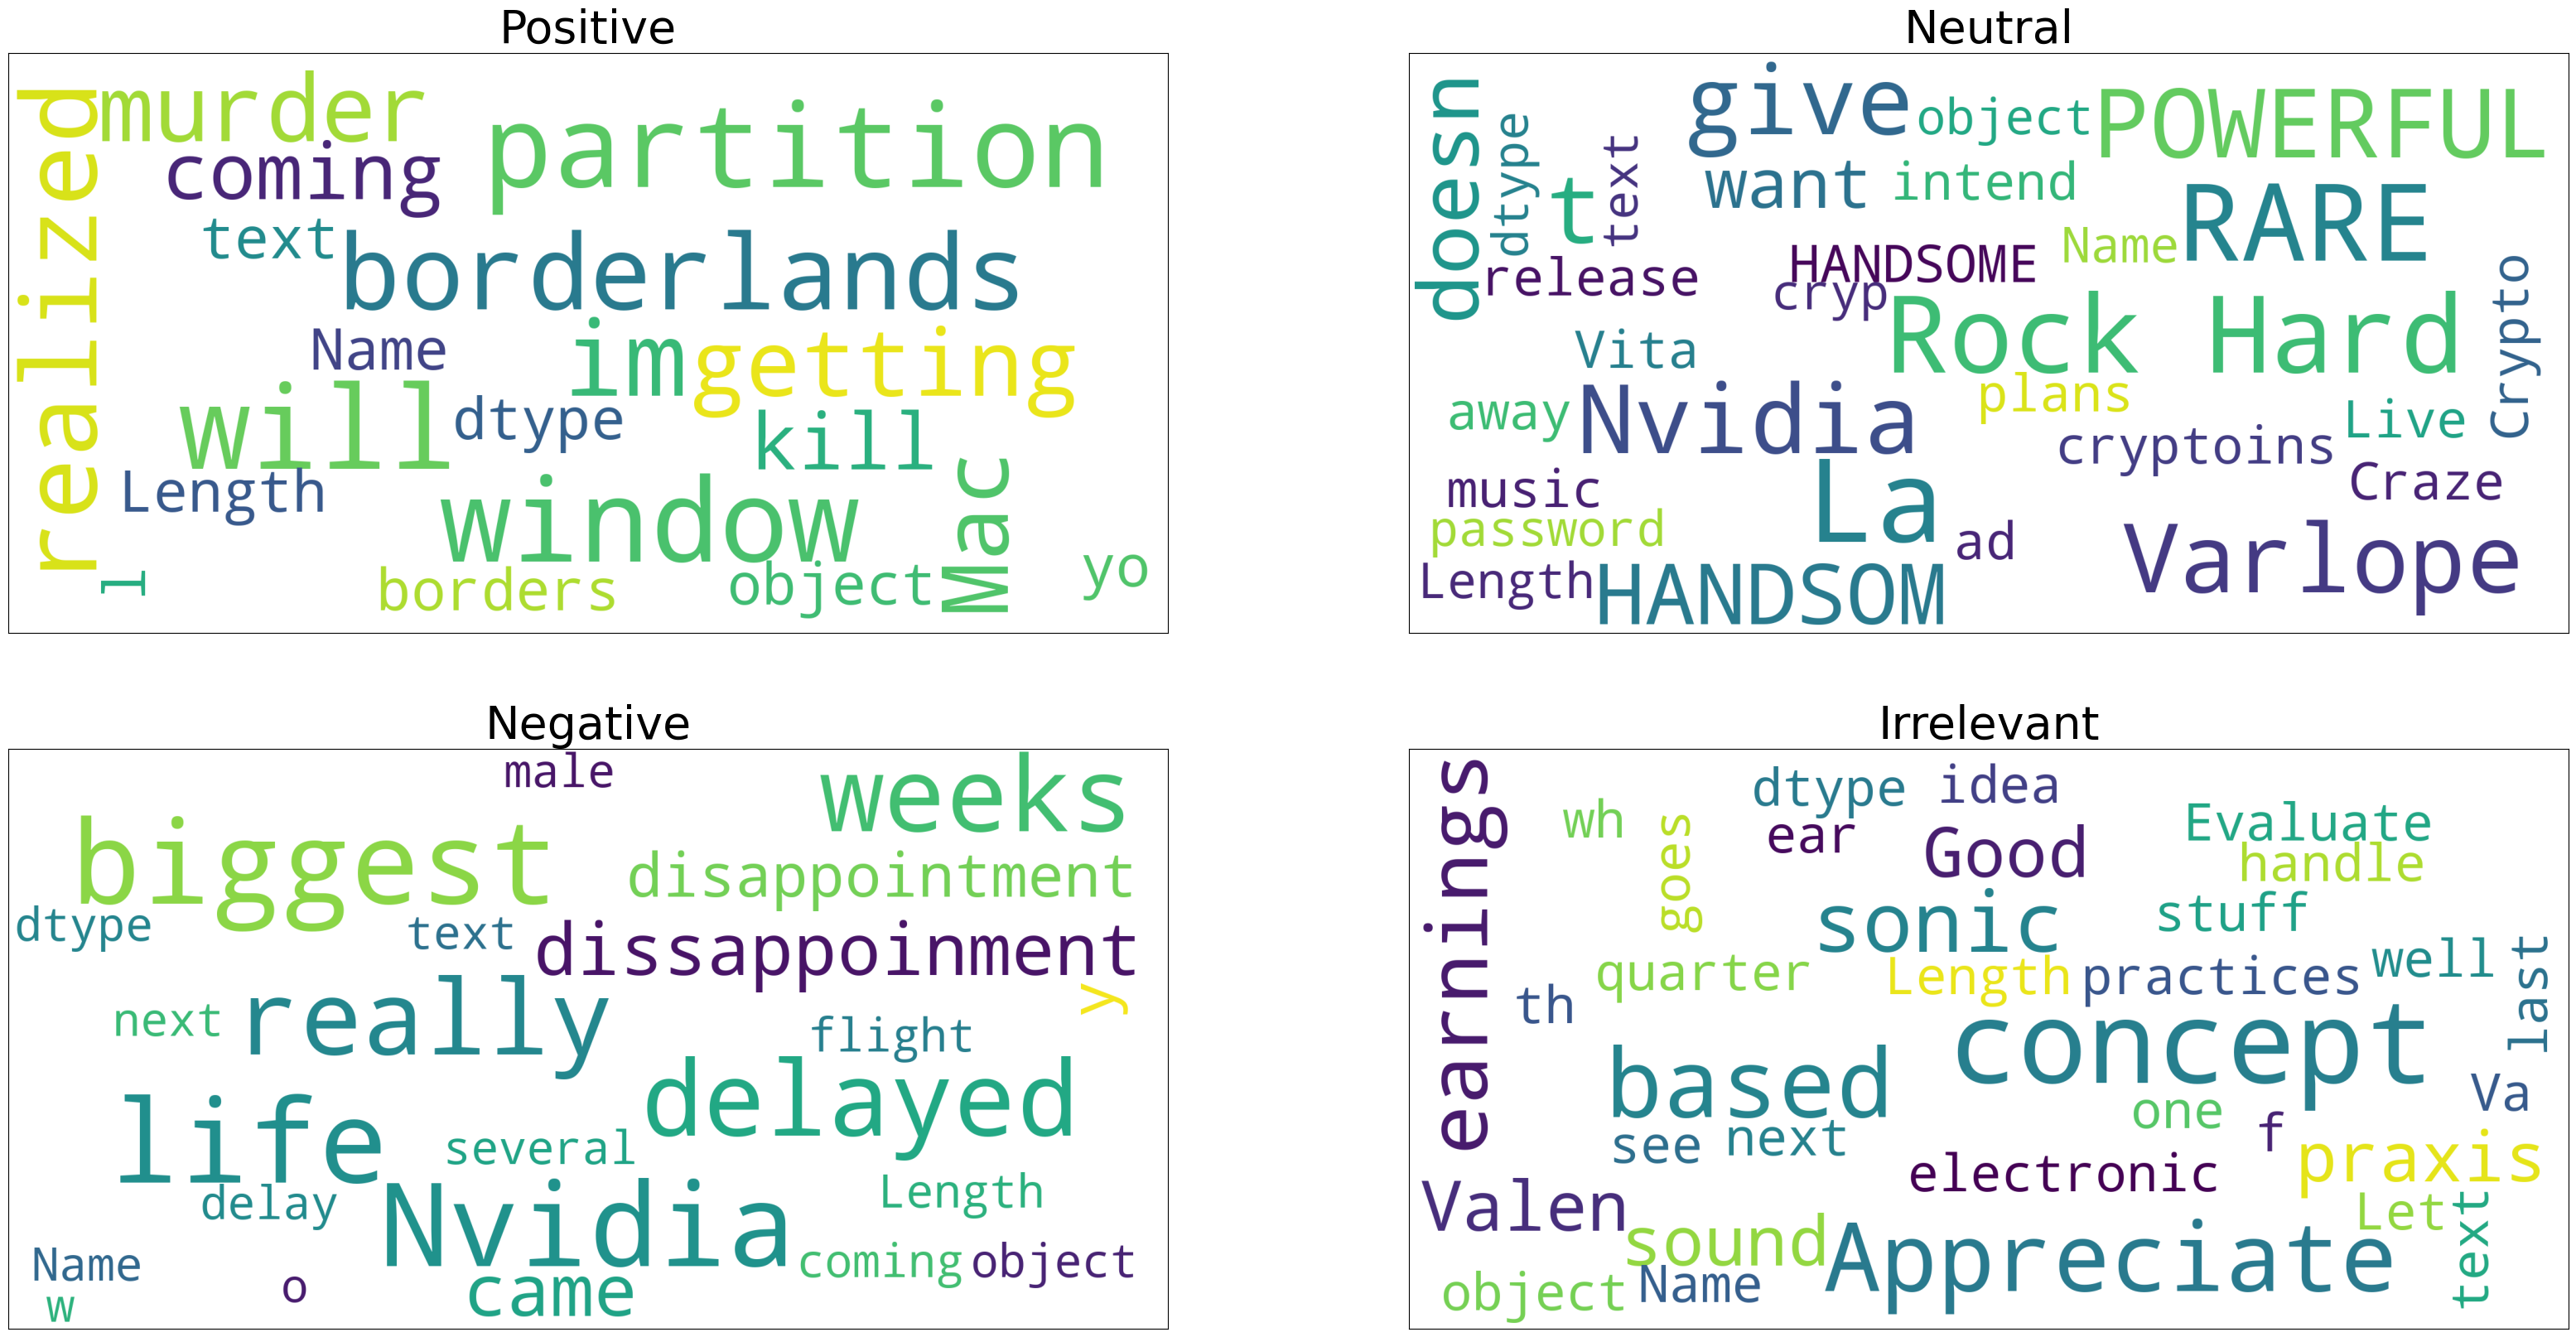

In [20]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)

    data = df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(sent, fontsize=40)

**Data Cleaning**

In [23]:
import re
from bs4 import BeautifulSoup

# Function to convert text to lowercase
def to_lowercase(text):
    return text.lower()

# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

# Function to remove HTML tags from text
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Function to remove special characters (punctuations, non-alphabetic symbols)
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Function to remove retweets (e.g., "RT @username")
def remove_rt(text):
    return re.sub(r'^RT\s@[\w]*:', '', text)

# Apply the cleaning functions
df['text'] = df['text'].apply(to_lowercase)
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(remove_special_chars)
df['text'] = df['text'].apply(remove_rt)

# Display cleaned text
df.head(3)

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,53,11,4.416667,2,0,0,0,0
1,Positive,i am coming to the borders and i will kill you...,51,12,3.923077,3,0,0,0,2
2,Positive,im getting on borderlands and i will kill you all,50,10,4.545455,2,0,0,0,0


**# Tarin Test Split**

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['sentiment'], test_size=0.2, random_state=0)

In [27]:
X_train.shape, X_test.shape

((57512,), (14378,))

**## Model Building and Testing**

In [28]:
# Convert stopwords to a list
stopwords = list(stopwords)

# Model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),  # Use list of stop words
    ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))
])

# Train the model
clf.fit(X_train, y_train)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


c:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


0.9225205174572263
              precision    recall  f1-score   support

  Irrelevant       0.97      0.86      0.91      2483
    Negative       0.93      0.94      0.94      4439
     Neutral       0.93      0.91      0.92      3510
    Positive       0.89      0.95      0.92      3946

    accuracy                           0.92     14378
   macro avg       0.93      0.92      0.92     14378
weighted avg       0.92      0.92      0.92     14378

[[2135   89   84  175]
 [  23 4190   80  146]
 [  20  136 3207  147]
 [  28   94   92 3732]]


In [29]:
import pickle
pickle.dump(clf, open("Twiter_sentiment.pkl", 'wb'))

In [30]:
clf.predict(["i am really glad to see you"])

array(['Positive'], dtype=object)

In [31]:
clf.predict(["let me not upset you"])

array(['Negative'], dtype=object)

In [32]:
clf.predict(["how the hell are we into halloween month already"])

array(['Irrelevant'], dtype=object)

In [33]:
clf.predict(["want dtype"])

array(['Positive'], dtype=object)